#### Project Description

This section of the project involves conducting a detailed empirical analysis of the cryptocurrency market, focusing specifically on the interlinkages among various cryptocurrency assets and the broader blockchain ecosystem. The objective is to gain deeper insights into the dynamics of the crypto market through a structured examination of selected cryptocurrencies over a defined period.

##### Objectives

- **Select and Analyze Cryptocurrencies**: Choose five cryptocurrencies based on daily price data from January 1, 2022, to December 31, 2022, and conduct a detailed analysis.
- **Price Trend Analysis**: Plot daily price movements and analyze the trends.
- **Volatility Assessment**: Calculate daily returns, assess volatility, and identify which cryptocurrency exhibits the most and least variation.
- **Correlation Analysis**: Construct a correlation matrix for the cryptocurrencies to explore their interrelationships.
- **Market Event Impact Analysis**: Examine the effect of the FTX bankruptcy on selected cryptocurrencies in November 2022.
- **Comparative Market Analysis**: Extend the analysis to include a comparison with the S&P 500 index, analyzing similarities and differences in market behavior.

##### Tools and Libraries

This analysis will employ several Python libraries:
- `pandas` for data manipulation,
- `numpy` for numerical operations,
- `matplotlib` and `seaborn` for data visualization.

This notebook will document our analytical processes, findings, and provide a rationale behind our analysis decisions. It serves as a professional report for the project submission.

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Set up visualization style
plt.style.use('ggplot')  # 'ggplot' style for all matplotlib plots
sns.set_context('talk')  # context = "talk", which is ideal for presentations

In [5]:
# Two decimal places formatting
pd.options.display.float_format = "{:,.2f}".format

In [4]:
# Debugging settings
pd.set_option('display.max_columns', None)  # Unhide all columns if needed during debugging

#### Selection of Cryptocurrencies

For the analysis, we have selected the following five cryptocurrencies:

- **Bitcoin (BTC)**: The first and most well-known cryptocurrency, often referred to as digital gold.
- **Ethereum (ETH)**: Known for its smart contract functionality, Ethereum is a primary platform for numerous decentralized applications.
- **XRP**: Originally created by Ripple Labs, XRP is known for its digital payment protocol more than its status as a cryptocurrency.
- **Dogecoin (DOGE)**: Initially started as a meme, Dogecoin has garnered a significant following and use case in tipping and charitable donations.
- **Tether (USDT)**: As a stablecoin pegged to the US dollar, Tether offers stability in the highly volatile crypto market.

Each of these cryptocurrencies has been chosen to provide a diverse view across different uses and markets in the crypto ecosystem.

##### Data Fetching

The following Python code will be used to fetch daily price data for these cryptocurrencies from January 1, 2022, to December 31, 2022. The data is sourced from Yahoo Finance using the `pandas_datareader` library.

In [59]:
# More lib
import yfinance as yf
from pandas import DataFrame

In [58]:
# Data timeframe
start_date = '2022-01-01'
end_date = '2022-12-31'

# Crypto tickers (yf)
cryptos = ['BTC-USD', 'ETH-USD', 'XRP-USD', 'DOGE-USD', 'USDT-USD']

# Fetch data
crypto_data = {crypto: yf.Ticker(crypto).history(start=start_date, end=end_date) for crypto in cryptos}

In [60]:
# Function to display head and tail of the DataFrame
def display_head_tail(df: DataFrame, num_rows: int = 3) -> None:
    display(pd.concat([df.head(num_rows), df.tail(num_rows)]))

In [61]:
# Display head & tail
for crypto, data in crypto_data.items():
    print(f"\n{crypto} Data Snapshot:")
    display_head_tail(data, 5)


BTC-USD Data Snapshot:


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-01 00:00:00+00:00,"46,311.75","47,827.31","46,288.48","47,686.81",24582667004,0.00,0.00
2022-01-02 00:00:00+00:00,"47,680.93","47,881.41","46,856.94","47,345.22",27951569547,0.00,0.00
2022-01-03 00:00:00+00:00,"47,343.54","47,510.73","45,835.96","46,458.12",33071628362,0.00,0.00
2022-01-04 00:00:00+00:00,"46,458.85","47,406.55","45,752.46","45,897.57",42494677905,0.00,0.00
2022-01-05 00:00:00+00:00,"45,899.36","46,929.05","42,798.22","43,569.00",36851084859,0.00,0.00
2022-12-26 00:00:00+00:00,"16,842.25","16,920.12","16,812.37","16,919.80",11886957804,0.00,0.00
2022-12-27 00:00:00+00:00,"16,919.29","16,959.85","16,642.07","16,717.17",15748580239,0.00,0.00
2022-12-28 00:00:00+00:00,"16,716.40","16,768.17","16,497.56","16,552.57",17005713920,0.00,0.00
2022-12-29 00:00:00+00:00,"16,552.32","16,651.76","16,508.68","16,642.34",14472237479,0.00,0.00



ETH-USD Data Snapshot:


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-01 00:00:00+00:00,"3,683.05","3,769.92","3,682.29","3,769.70",9776191466,0.00,0.00
2022-01-02 00:00:00+00:00,"3,769.30","3,836.16","3,727.36","3,829.56",9881471548,0.00,0.00
2022-01-03 00:00:00+00:00,"3,829.54","3,836.20","3,698.05","3,761.38",12080777893,0.00,0.00
2022-01-04 00:00:00+00:00,"3,761.36","3,876.79","3,723.35","3,794.06",14030925983,0.00,0.00
2022-01-05 00:00:00+00:00,"3,794.27","3,842.06","3,456.75","3,550.39",18061338502,0.00,0.00
2022-12-26 00:00:00+00:00,"1,218.92","1,226.97","1,214.34","1,226.97",3282098400,0.00,0.00
2022-12-27 00:00:00+00:00,"1,226.99","1,230.42","1,205.90","1,212.79",4091530737,0.00,0.00
2022-12-28 00:00:00+00:00,"1,212.74","1,213.13","1,185.70","1,189.99",4991669631,0.00,0.00
2022-12-29 00:00:00+00:00,"1,190.01","1,204.14","1,188.36","1,201.60",4132233940,0.00,0.00



XRP-USD Data Snapshot:


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-01 00:00:00+00:00,0.83,0.85,0.83,0.85,1156464024,0.00,0.00
2022-01-02 00:00:00+00:00,0.85,0.86,0.84,0.86,1134033205,0.00,0.00
2022-01-03 00:00:00+00:00,0.86,0.86,0.82,0.83,1428968710,0.00,0.00
2022-01-04 00:00:00+00:00,0.83,0.84,0.82,0.82,1514079366,0.00,0.00
2022-01-05 00:00:00+00:00,0.82,0.84,0.73,0.77,2252733064,0.00,0.00
2022-12-26 00:00:00+00:00,0.35,0.37,0.35,0.37,797909103,0.00,0.00
2022-12-27 00:00:00+00:00,0.37,0.37,0.36,0.37,905248563,0.00,0.00
2022-12-28 00:00:00+00:00,0.37,0.37,0.36,0.36,839617676,0.00,0.00
2022-12-29 00:00:00+00:00,0.36,0.36,0.34,0.34,898022518,0.00,0.00



DOGE-USD Data Snapshot:


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-01 00:00:00+00:00,0.17,0.17,0.17,0.17,371336089,0.00,0.00
2022-01-02 00:00:00+00:00,0.17,0.18,0.17,0.17,391041933,0.00,0.00
2022-01-03 00:00:00+00:00,0.17,0.17,0.17,0.17,505900382,0.00,0.00
2022-01-04 00:00:00+00:00,0.17,0.17,0.17,0.17,541922892,0.00,0.00
2022-01-05 00:00:00+00:00,0.17,0.17,0.15,0.16,994086848,0.00,0.00
2022-12-26 00:00:00+00:00,0.08,0.08,0.07,0.08,248935710,0.00,0.00
2022-12-27 00:00:00+00:00,0.08,0.08,0.07,0.07,290428818,0.00,0.00
2022-12-28 00:00:00+00:00,0.07,0.07,0.07,0.07,496350491,0.00,0.00
2022-12-29 00:00:00+00:00,0.07,0.07,0.07,0.07,285144119,0.00,0.00



USDT-USD Data Snapshot:


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-01 00:00:00+00:00,1.00,1.00,1.00,1.00,43336209524,0.00,0.00
2022-01-02 00:00:00+00:00,1.00,1.00,1.00,1.00,43202922802,0.00,0.00
2022-01-03 00:00:00+00:00,1.00,1.00,1.00,1.00,54125933259,0.00,0.00
2022-01-04 00:00:00+00:00,1.00,1.00,1.00,1.00,60765931554,0.00,0.00
2022-01-05 00:00:00+00:00,1.00,1.00,1.00,1.00,77225535519,0.00,0.00
2022-12-26 00:00:00+00:00,1.00,1.00,1.00,1.00,14986560291,0.00,0.00
2022-12-27 00:00:00+00:00,1.00,1.00,1.00,1.00,18554435182,0.00,0.00
2022-12-28 00:00:00+00:00,1.00,1.00,1.00,1.00,21161758512,0.00,0.00
2022-12-29 00:00:00+00:00,1.00,1.00,1.00,1.00,18567214596,0.00,0.00


In [62]:
# NaN check
for crypto, data in crypto_data.items():
    print(f"\nMissing data in {crypto}:")
    print(data.isnull().sum())


Missing data in BTC-USD:
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

Missing data in ETH-USD:
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

Missing data in XRP-USD:
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

Missing data in DOGE-USD:
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

Missing data in USDT-USD:
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


##### Detailed Overview & Crypto Protocol

*Bitcoin (BTC)*

- **Overview**: Introduced in 2009 by an individual or group under the pseudonym Satoshi Nakamoto, Bitcoin is the first cryptocurrency ever created. It is designed as a decentralized digital currency without a central bank or single administrator. Bitcoin can be sent from user to user on the peer-to-peer bitcoin network without intermediaries.
- **Protocol**: Bitcoin operates on a proof-of-work (PoW) blockchain protocol, where miners use computational power to solve complex mathematical problems and verify transactions, securing the network and earning bitcoins as a reward.

*Ethereum (ETH)*

- **Overview**: Ethereum was launched in 2015 and is not just a cryptocurrency but also a platform for developing decentralized applications (DApps) using smart contracts. Ethereum aims to create a decentralized suite of financial products that anyone in the world can freely access, regardless of nationality, ethnicity, or faith.
- **Protocol**: Ethereum currently uses a proof-of-work mechanism similar to Bitcoin but is in the process of transitioning to proof-of-stake (PoS) with its Ethereum 2.0 upgrade, aiming to improve scalability and energy efficiency.

*XRP (Ripple)*

- **Overview**: XRP was created by Ripple Labs Inc. in 2012 as part of a digital payment network and protocol. Unlike many other cryptocurrencies, XRP doesn't use a blockchain to achieve a network-wide consensus for transactions. Instead, it uses an iterative consensus process that makes it faster and more energy-efficient than Bitcoin.
- **Protocol**: XRP Ledger employs a consensus protocol that validates account balances and transactions by polling multiple nodes instead of using a traditional blockchain mining method.

*Dogecoin (DOGE)*

- **Overview**: Initially started as a joke in 2013 based on the popular "Doge" meme featuring a Shiba Inu dog, Dogecoin's community has grown significantly. It is used primarily for tipping online content creators and charitable donations.
- **Protocol**: Dogecoin uses a proof-of-work algorithm similar to Litecoin's, which is less energy-intensive than Bitcoin's version. It uses a Scrypt algorithm, which allows for quicker processing of transactions.

*Tether (USDT)*

- **Overview**: Tether was launched in 2014 and is a stablecoin that is pegged to the US dollar. It is designed to combine the unrestricted nature of cryptocurrencies — which can be sent between users without a trusted third-party intermediary — with the stable value of the US dollar.
- **Protocol**: Tether operates on multiple protocols including the Bitcoin blockchain via the Omni Layer Protocol, and on the Ethereum blockchain as an ERC-20 token, among others.

##### Crypto Selection Rationale

- **Diversity and Relevance**: Our group selected these five cryptocurrencies due to their diverse applications and significance in the crypto market. Bitcoin and Ethereum represent the cornerstone of the cryptocurrency world, with extensive adoption and ongoing developments.
- **Technological Diversity**: XRP and Tether showcase variations in blockchain technology applications, especially in how they manage transactions and consensus without traditional mining.
- **Community and Innovation**: Dogecoin is an example of how a community can drive the value and adoption of a currency that started as a joke but has now been used in substantial charitable acts and online tipping.
- **Market Stability and Innovations**: Tether brings a perspective on how cryptocurrencies can be stabilized against the US dollar to reduce volatility, which is a significant concern for typical cryptocurrencies like Bitcoin and Ethereum.

#### Daily Price Plot

In [63]:
# Plot lib
import matplotlib.pyplot as plt

In [64]:
# Re-fetch (lazy)
crypto_data = {crypto: yf.Ticker(crypto).history(start=start_date, end=end_date)['Close'] for crypto in cryptos}

# Dict conv
crypto_prices = pd.DataFrame(crypto_data)

In [ ]:
# Dict conv
crypto_prices = pd.DataFrame(crypto_data)

# CSV save
crypto_prices.to_csv('crypto_prices.csv', index=True)

In [68]:
# Standardize
standardized_prices = (crypto_prices - crypto_prices.mean()) / crypto_prices.std()

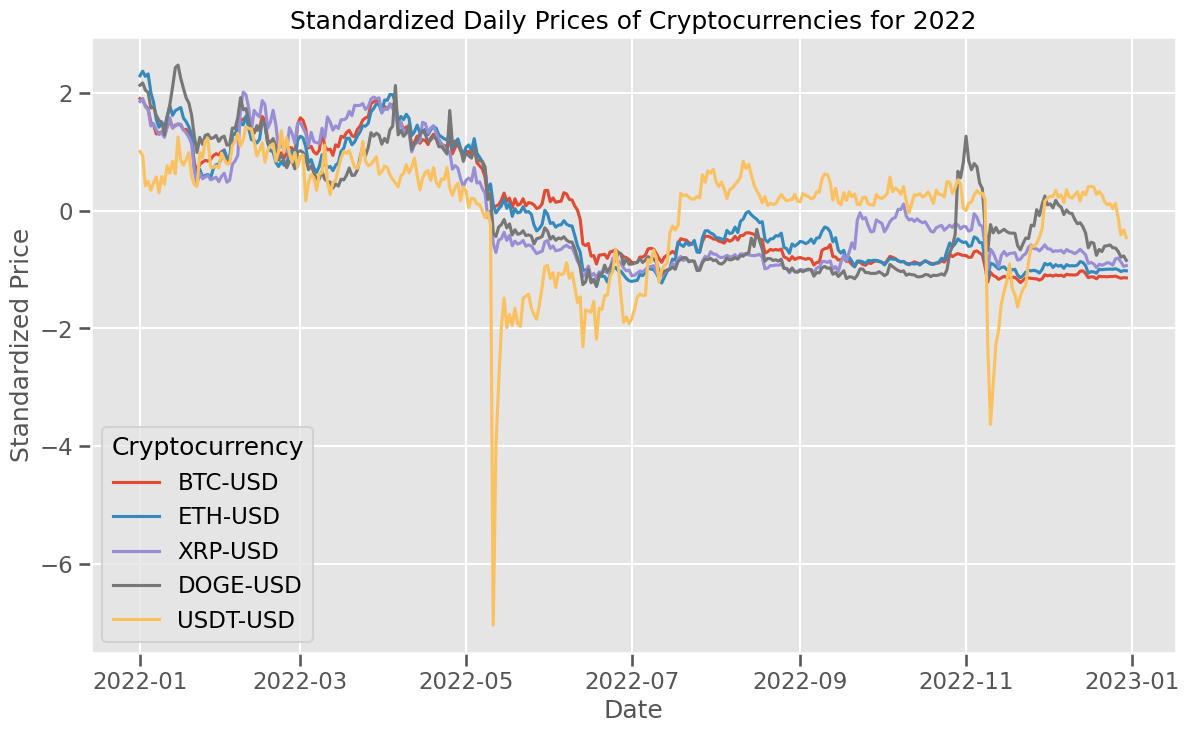

In [67]:
# Plot
plt.figure(figsize=(14, 8))
for crypto in standardized_prices.columns:
    plt.plot(standardized_prices.index, standardized_prices[crypto], label=crypto)

plt.title('Standardized Daily Prices of Cryptocurrencies for 2022')
plt.xlabel('Date')
plt.ylabel('Standardized Price')
plt.legend(title='Cryptocurrency')
plt.grid(True)
plt.show()

#### Price Trend Analysis

Upon reviewing the standardized daily prices of the five cryptocurrencies throughout 2022, several observations can be made:

- **Concurrent Movements**: It's evident that there are periods where all cryptocurrencies move together, suggesting a market-wide trend or reaction to external factors. This is particularly noticeable during sharp market downturns, which could be linked to significant global economic events or industry-specific news.

- **Volatility**: The cryptocurrencies exhibit different levels of volatility. Bitcoin (BTC) and Ethereum (ETH), while still volatile, show more moderate fluctuations compared to the extreme spikes observed in currencies like Dogecoin (DOGE).

- **Stability of Tether (USDT)**: The plot clearly shows that Tether (USDT), a stablecoin pegged to the US dollar, maintains a relatively flat line, indicating its stability compared to the other cryptocurrencies. This is expected as Tether's value is designed to be stable.

- **Significant Dips**: There are notable dips in the plot, particularly for DOGE. These moments align with major news events in the cryptocurrency space, such as the collapse of certain crypto platforms or changes in regulations, which often lead to sudden market reactions.

- **Recovery Phases**: After significant dips, there are periods of recovery, where the price trends upwards. This recovery is not uniform across the cryptocurrencies, with some (like BTC and ETH) showing quicker recovery compared to others.

- **Market Sentiment**: The synchronized movements of the cryptocurrencies, especially during steep inclines or declines, reflect the market sentiment. Cryptocurrencies are known to be highly sentiment-driven, and this plot reinforces that understanding.

In conclusion, the price variations indicate that while the cryptocurrency market as a whole tends to react similarly to significant events, individual cryptocurrencies exhibit their unique responses and resilience to market changes. The analysis also highlights the distinct behavior of stablecoins like Tether in maintaining price stability amidst market volatility.